In [2]:
# !pip install pywhatkit

In [3]:
import pywhatkit as pwk
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd

In [4]:
log_file = 'logfile.csv'

In [5]:
choice = True

In [6]:

def log_action(receiver,status,message):
    
    nonempty_bool = os.path.exists('logfile.csv') and os.path.getsize('logfile.csv') > 0
    
    if nonempty_bool :
        df = pd.read_csv('logfile.csv')
        
    else:
        df = pd.DataFrame(columns = ['timestamp','receiver','status','message'])

        
    new_row = {
        'timestamp' :datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'receiver':receiver,
        'status':status,
        'message':message
    }

   
    
    df = pd.concat([df,pd.DataFrame([new_row])],ignore_index = True,axis = 0)
    df.to_csv('logfile.csv',index = False)

    

In [7]:
try:
    def delete_logs():
        try:
            empty_df = df[0:0] #it has only structure  without data
            dell = int(input('do you want to clear logs press 0 to cancel and 1 to delete '))
            if dell :
                # print(type(df))
                empty_df.to_csv('logfile.csv',index = False) #overwritting to seem as deletion
                print('succesfully cleared logs')
            else:
                print('deleteiton cacncleed')
        except Exception as e:
            print('Message sent failed')
        
    def input_data():
        try:
            data = list(map(str,input('enter  phone +951586xxx1 and message in __form__: ').split()))
            if len(data[0])==13:
                receiver_ph = data[0]
                message_ph = data[1]
                return receiver_ph,message_ph
            else :
                print('enter phone number properly')
        except Exception as e:
            print('error occured make sure while entering')
    
            
         
    def instantly_message():
        # instantly message
        try:
            receiver_ph,message_ph = input_data()
            pwk.sendwhatmsg_instantly(phone_no=receiver_ph,
                                      message=message_ph,
                                      wait_time=10)
            log_action(receiver =receiver_ph ,status='sent',message=message_ph)
        except Exception as e:
            print('Message sent failed')
    
    
    
    def waittime_message():
    # waittime message
        try:
            receiver_ph,message_ph = input_data()
            now = datetime.now()
            now_hour, now_minute = now.hour, now.minute
            pwk.sendwhatmsg(
                phone_no=receiver_ph,
                message=message_ph,
                time_hour=now_hour,
                time_min=now_minute + 2,
                wait_time=12
            )
            log_action(receiver=receiver_ph, status='sent', message=message_ph)
        except Exception as e:
            print('Message sent failed')
    
        
    def instantly_image():
        # instantly image
        try:
            receiver_ph,message_ph = input_data()
            pwk.sendwhats_image(receiver=receiver_ph,
                                img_path=r'C:\Users\sudha\EDUCATION\MINE A9\ganesh.jpg',
                                wait_time=12,
                                caption = message_ph+'pic'
                               )
            log_action(receiver =receiver_ph ,status='sent',message=message_ph)
        except Exception as e:
            print('Message sent failed')
    
     
    def waittime_message_group():
        # mesaage to group waittime
        try:
            message_ph = input('enter message to group')
            group_idd ='120363307866401933@g.us'
            now = datetime.now()
            now_hour, now_minute = now.hour, now.minute
            pwk.sendwhatmsg_to_group(group_id=group_idd,message=message_ph,time_hour=now_hour,time_min=now_minute+1)
            log_action(receiver =group_idd ,status='sent',message=message_ph)
        except Exception as e:
            print('Message sent failed')
    
    def multiplemessages(message_phhh):
        try:
            for i in message_phhh:
                receiver_ph = input('enter receiver_ph +9195xxxxxxx81: ')
                pwk.sendwhatmsg_instantly(phone_no=receiver_ph,
                                          message=i,
                                          wait_time=12)
                log_action(receiver =receiver_ph ,status='sent',message=i)
        except Exception as e:
                print('Message sent failed')
    
except Exception as e:
    print('Message sent failed')

In [8]:
while(choice):
    
    print("Choose an option:")
    print("1. Instantly message")
    print("2. Waittime Message")
    print("3. Instantly Send Image")
    print("4. Group Waittime Message")
    print("5. Multiple Messages")
    print("6. Delete logs")
    
    choiceee = int(input("Enter choice (1-6): ").strip())
    match choiceee:
        case 1:
            instantly_message()
        case 2:
            waittime_message()
        case 3:
            instantly_image()
        case 4:
            waittime_message_group()
        case 5:
             mul_mess = list(map(str,input('enter multiple messagess with spaces ').split()))
             multiplemessages(mul_mess)
        case 6:
            delete_logs()
        case _:
            print("Invalid choice (1-6)")

    
    try:
        choice = int(input('enter 0 to quit and 1 for continue:'))
    except Exception as e:
        print('an error occured run againn')
    

Choose an option:
1. Instantly message
2. Waittime Message
3. Instantly Send Image
4. Group Waittime Message
5. Multiple Messages
6. Delete logs


Enter choice (1-6):  0


Invalid choice (1-6)


enter 0 to quit and 1 for continue: 0


## EDA to logfile.csv

In [9]:
df_log = pd.read_csv('logfile.csv')

In [10]:
df_log.columns

Index(['timestamp', 'receiver', 'status', 'message'], dtype='object')

In [11]:
df_log.shape

(420000, 4)

In [12]:
df_log.dtypes

timestamp    object
receiver      int64
status       object
message      object
dtype: object

In [13]:
df_log

,timestamp,receiver,status,message
0,31-08-2025 13:41,919029218309,sent,hey
1,02-09-2025 01:10,919961192402,sent,hey
2,08-09-2025 03:30,918135002971,sent,okay
3,07-09-2025 20:21,918436776046,sent,sure
4,19-09-2025 09:58,917687887037,sent,bye
...,...,...,...,...
419995,05-09-2025 19:10,917892499523,sent,sorry
419996,10-09-2025 07:44,919141286955,sent,congrats
419997,08-09-2025 16:35,918000433252,sent,hello
419998,20-09-2025 15:15,917207926565,sent,good_evening


### datatyoe conversion

In [14]:
df_log['timestamp'] = pd.to_datetime( df_log['timestamp'],dayfirst=True, errors='coerce')

In [15]:
df_log['timestamp'].dtypes

dtype('<M8[ns]')

In [16]:
df_log['status'] = df_log['status'].astype('string')

In [17]:
df_log['status'].dtypes

string[python]

In [18]:
df_log['receiver'] = df_log['receiver'].astype('string')

In [19]:
df_log['receiver'].dtype

string[python]

In [20]:
df_log['message'] = df_log['message'].astype('string')

In [21]:
df_log['message'].dtype

string[python]

In [22]:
df_log.dtypes

timestamp    datetime64[ns]
receiver     string[python]
status       string[python]
message      string[python]
dtype: object

In [23]:
df_log.head()

,timestamp,receiver,status,message
0,2025-08-31 13:41:00,919029218309,sent,hey
1,2025-09-02 01:10:00,919961192402,sent,hey
2,2025-09-08 03:30:00,918135002971,sent,okay
3,2025-09-07 20:21:00,918436776046,sent,sure
4,2025-09-19 09:58:00,917687887037,sent,bye


### Check Null values

In [24]:
df_log.isnull().sum()
# clearly there is no null values in dataframe

timestamp    0
receiver     0
status       0
message      0
dtype: int64

In [25]:
df_log['message'].value_counts()

message
hi               67897
hello            54252
okay             45292
thanks           35901
bye              31570
sure             26920
hey              22448
sorry            22356
good_morning     18105
good_evening     13775
see_you_later    13681
love_you         13445
on_my_way         9134
call_me           9063
miss_you          9053
good_night        8995
enjoy             4624
need_help         4588
congrats          4512
good_luck         4389
Name: count, dtype: Int64

In [26]:
df_log['receiver'].value_counts()

receiver
917794046348    5
919190383400    5
917657717128    5
916866469732    4
919541675598    4
               ..
919106143217    1
919141286955    1
918000433252    1
917207926565    1
917385888899    1
Name: count, Length: 399980, dtype: Int64

In [27]:
df_log['timestamp'].value_counts()

timestamp
2025-08-27 19:20:00    39
2025-08-29 14:13:00    38
2025-08-31 03:34:00    38
2025-08-30 00:46:00    38
2025-08-29 15:19:00    38
                       ..
2025-09-26 00:08:00     1
2025-09-27 20:19:00     1
2025-09-24 12:34:00     1
2025-09-28 23:19:00     1
2025-09-29 05:51:00     1
Name: count, Length: 49865, dtype: int64

In [28]:
df_log['status'].value_counts()

status
sent    420000
Name: count, dtype: Int64

## Visualization

## 1.Most fequently used messages

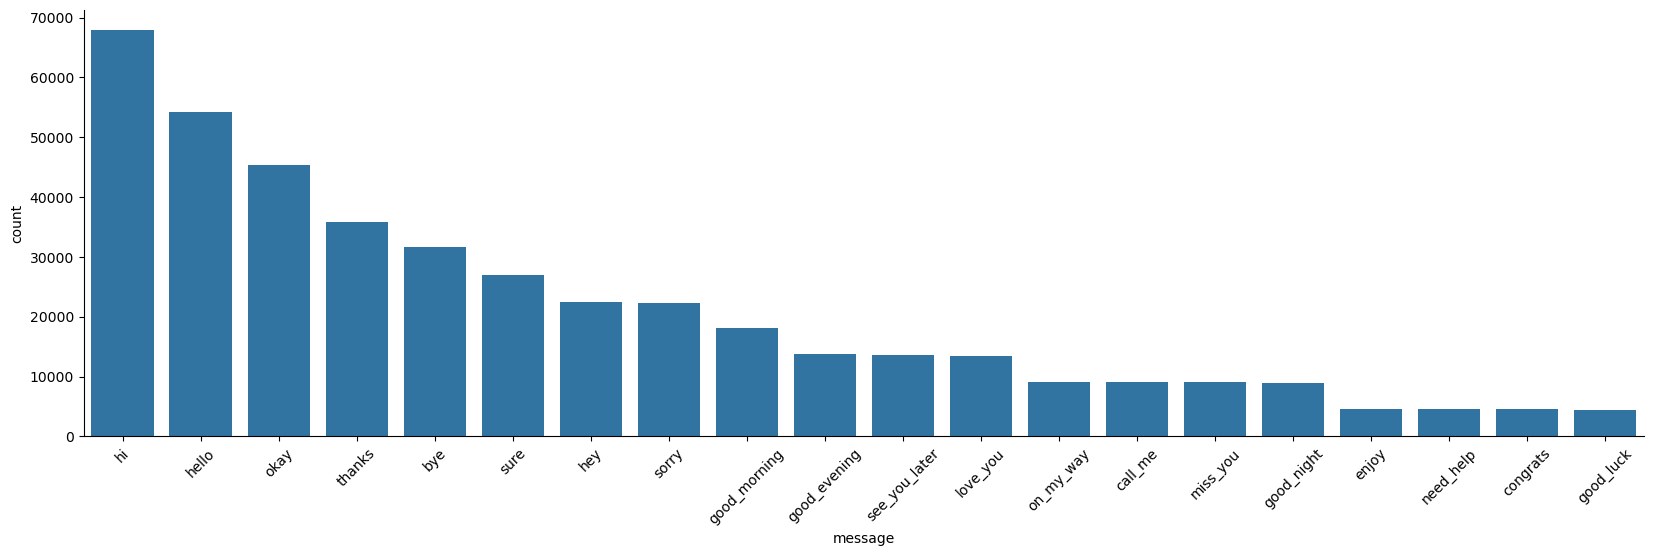

message
hi               67897
hello            54252
okay             45292
thanks           35901
bye              31570
sure             26920
hey              22448
sorry            22356
good_morning     18105
good_evening     13775
see_you_later    13681
love_you         13445
on_my_way         9134
call_me           9063
miss_you          9053
good_night        8995
enjoy             4624
need_help         4588
congrats          4512
good_luck         4389
Name: count, dtype: Int64

In [29]:
data = df_log
message_desc = df_log['message'].value_counts().index
# index attribute is used to get order
sns.catplot( data = data,x = 'message' ,kind='count',order=message_desc,aspect=10/3)
plt.xticks(rotation = 45)
plt.show()
df_log['message'].value_counts()
# from this we clearly see that messages like 'hi','hello','okay','thanks','bye', 'sure' are the most fequently top 6 used messages
# from this outliers are 'gooo_luck' ,'congrats','need_help','enjow'

## 2. Time-Based Activity Patterns


In [30]:
df_log.tail()

,timestamp,receiver,status,message
419995,2025-09-05 19:10:00,917892499523,sent,sorry
419996,2025-09-10 07:44:00,919141286955,sent,congrats
419997,2025-09-08 16:35:00,918000433252,sent,hello
419998,2025-09-20 15:15:00,917207926565,sent,good_evening
419999,2025-08-30 16:19:00,917385888899,sent,hey


In [31]:
# df_log.drop(columns='hours',inplace=True)

In [32]:
data_hours = df_log['timestamp'].apply(lambda x : x.hour)

<Axes: xlabel='timestamp', ylabel='Count'>

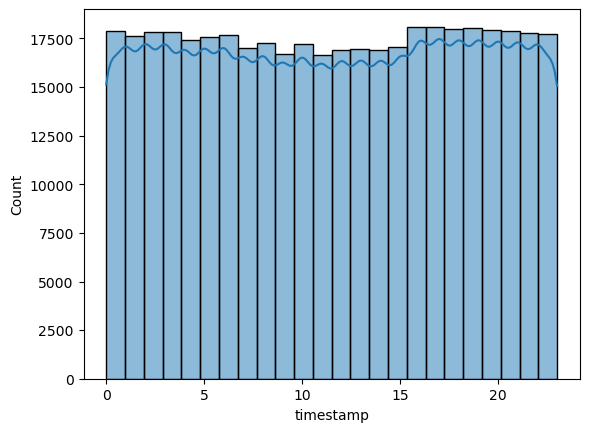

In [33]:
sns.histplot(x = data_hours,kde = True,bins=24)

In [34]:
df_log['hour'] = df_log['timestamp'].apply(lambda x : x.hour)

<Axes: xlabel='timestamp', ylabel='message'>

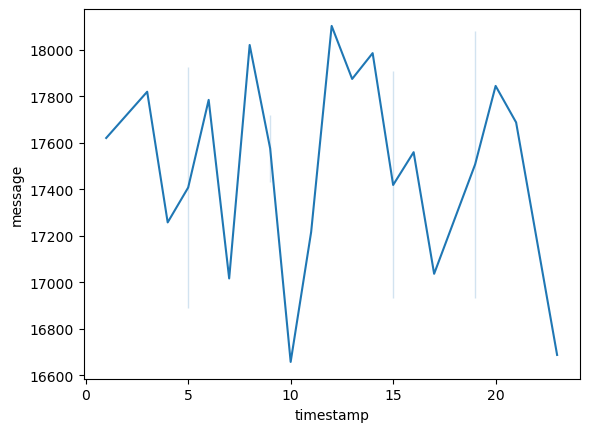

In [35]:
count_per_hour = df_log.groupby("hour")["message"].count().reset_index()
sns.lineplot(x = data_hours, y = 'message',data = count_per_hour )
# from this at 10:00 Am and 23:00PM the messages coutn ae almost decreased 
# from this plot afteernon time havve more number of messages

In [36]:
df_log.tail()

,timestamp,receiver,status,message,hour
419995,2025-09-05 19:10:00,917892499523,sent,sorry,19
419996,2025-09-10 07:44:00,919141286955,sent,congrats,7
419997,2025-09-08 16:35:00,918000433252,sent,hello,16
419998,2025-09-20 15:15:00,917207926565,sent,good_evening,15
419999,2025-08-30 16:19:00,917385888899,sent,hey,16


In [37]:
c = df_log.groupby(['hour','message']).agg(count = ('message' ,'count'))

In [38]:
c

count
hour message             
0    bye             1357
     call_me          390
     congrats         192
     enjoy            198
     good_evening     621
...                   ...
23   on_my_way        388
     see_you_later    619
     sorry            929
     sure            1148
     thanks          1496

[480 rows x 1 columns]

### 3.Receiver Analysis: Most contacted numbers

In [39]:
df_log['receiver'].value_counts()

receiver
917794046348    5
919190383400    5
917657717128    5
916866469732    4
919541675598    4
               ..
919106143217    1
919141286955    1
918000433252    1
917207926565    1
917385888899    1
Name: count, Length: 399980, dtype: Int64

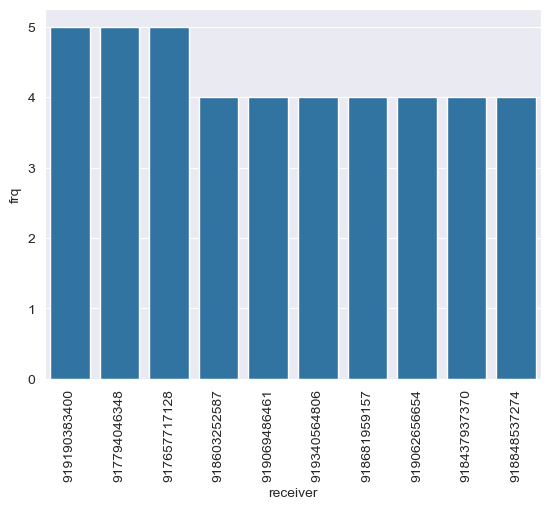

In [56]:
b = df_log.groupby('receiver').agg(frq = ('receiver','count')).sort_values("frq", ascending=False)
sns.set_style('darkgrid')
sns.barplot(x= 'receiver',y = 'frq' ,data = b.head(10) )
plt.xticks(rotation = 90)
plt.show()
# top receivers across ALL data